In [1]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline
with open('dates.pkl', 'rb') as pfile:
    dates = pickle.load(pfile)
giganteabs = np.load('abmodel.model.docvecs.vectors_docs.npy')
gigsort = giganteabs[np.asarray(dates).argsort()]
datesort = np.asarray(dates)
datesort = np.sort(datesort)
with open('pnos.pkl', 'rb') as pfile:
    pnos = pickle.load(pfile)
pnosort = np.asarray(pnos)[np.asarray(dates).argsort()]
gigsort = gigsort[11635:]
datesort = datesort[11635:]
pnosort = pnosort[11635:]
gigsort = gigsort[:1234205]
datesort = datesort[:1234205]
pnosort = pnosort[:1234205]

In [2]:
setindx = [sum([x<a for x in datesort]) for a in [19740000 + i*10000 for i in range(26,28)]]

In [3]:
setindx
workingd = gigsort[setindx[0]:setindx[1]]

In [20]:
workpno = pnosort[setindx[0]:setindx[1]]

In [13]:
workpno[labels==2][:20]

array(['H50', '6010721', '5972969', '6033892', '6011005', '6063727',
       '5600103', '6033891', '5350862', '3660488', '0 296 597 A2',
       '5959139', '5552379', '0 848 060', '5998707', '6177619', '5723632',
       '5945588', '5866773', '95/26955'], dtype='<U18')

In [26]:
with open('initlabs.pkl', 'wb') as picklefile:
    pickle.dump(labels, picklefile)
with open('initPnos.pkl', 'wb') as picklefile:
    pickle.dump(workpno, picklefile)

In [2]:
import pickle
with open('initlabs.pkl','rb') as pfile:
    labels = pickle.load(pfile)
with open('initPnos.pkl','rb') as pfile:
    workpno = pickle.load(pfile)

In [4]:
db = DBSCAN(eps = .25, min_samples = 2, metric = 'cosine', n_jobs = -1).fit(workingd)
labels = np.asarray(db.labels_)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
for j in list(set(labels)):
    print(j, end = ': ')
    print(sum([x == j for x in labels]))

205
0: 2
1: 2
2: 892
3: 3
4: 2
5: 3
6: 3
7: 2
8: 2
9: 2
10: 4
11: 2
12: 2
13: 2
14: 2
15: 2
16: 2
17: 2
18: 2
19: 2
20: 2
21: 2
22: 2
23: 2
24: 2
25: 2
26: 2
27: 2
28: 2
29: 2
30: 2
31: 2
32: 2
33: 2
34: 2
35: 2
36: 2
37: 2
38: 3
39: 2
40: 2
41: 2
42: 2
43: 3
44: 2
45: 2
46: 5
47: 2
48: 2
49: 2
50: 2
51: 2
52: 2
53: 2
54: 2
55: 2
56: 2
57: 2
58: 2
59: 2
60: 2
61: 2
62: 2
63: 5
64: 2
65: 2
66: 3
67: 2
68: 2
69: 3
70: 2
71: 2
72: 2
73: 2
74: 2
75: 2
76: 2
77: 2
78: 2
79: 2
80: 2
81: 2
82: 2
83: 2
84: 2
85: 2
86: 2
87: 2
88: 2
89: 2
90: 3
91: 2
92: 2
93: 2
94: 2
95: 2
96: 2
97: 2
98: 2
99: 2
100: 2
101: 2
102: 2
103: 2
104: 2
105: 2
106: 2
107: 2
108: 3
109: 2
110: 2
111: 2
112: 2
113: 2
114: 2
115: 2
116: 2
117: 2
118: 2
119: 2
120: 2
121: 2
122: 2
123: 2
124: 2
125: 2
126: 2
127: 3
128: 2
129: 2
130: 2
131: 3
132: 2
133: 2
134: 2
135: 2
136: 2
137: 2
138: 2
139: 2
140: 2
141: 2
142: 2
143: 2
144: 2
145: 2
146: 2
147: 2
148: 2
149: 2
150: 2
151: 2
152: 2
153: 2
154: 2
155: 2
156: 2
157: 

In [5]:
pretty = TSNE(n_components = 2, metric = 'cosine', init = 'pca', random_state = 66, \
              angle = .7).fit_transform(workingd)

In [5]:
with open('2000tsneVecs.pkl', 'wb') as picklefile:
    pickle.dump(pretty, picklefile)
with open('2000tsneVecs.pkl','rb') as pfile:
    pretty = pickle.load(pfile)

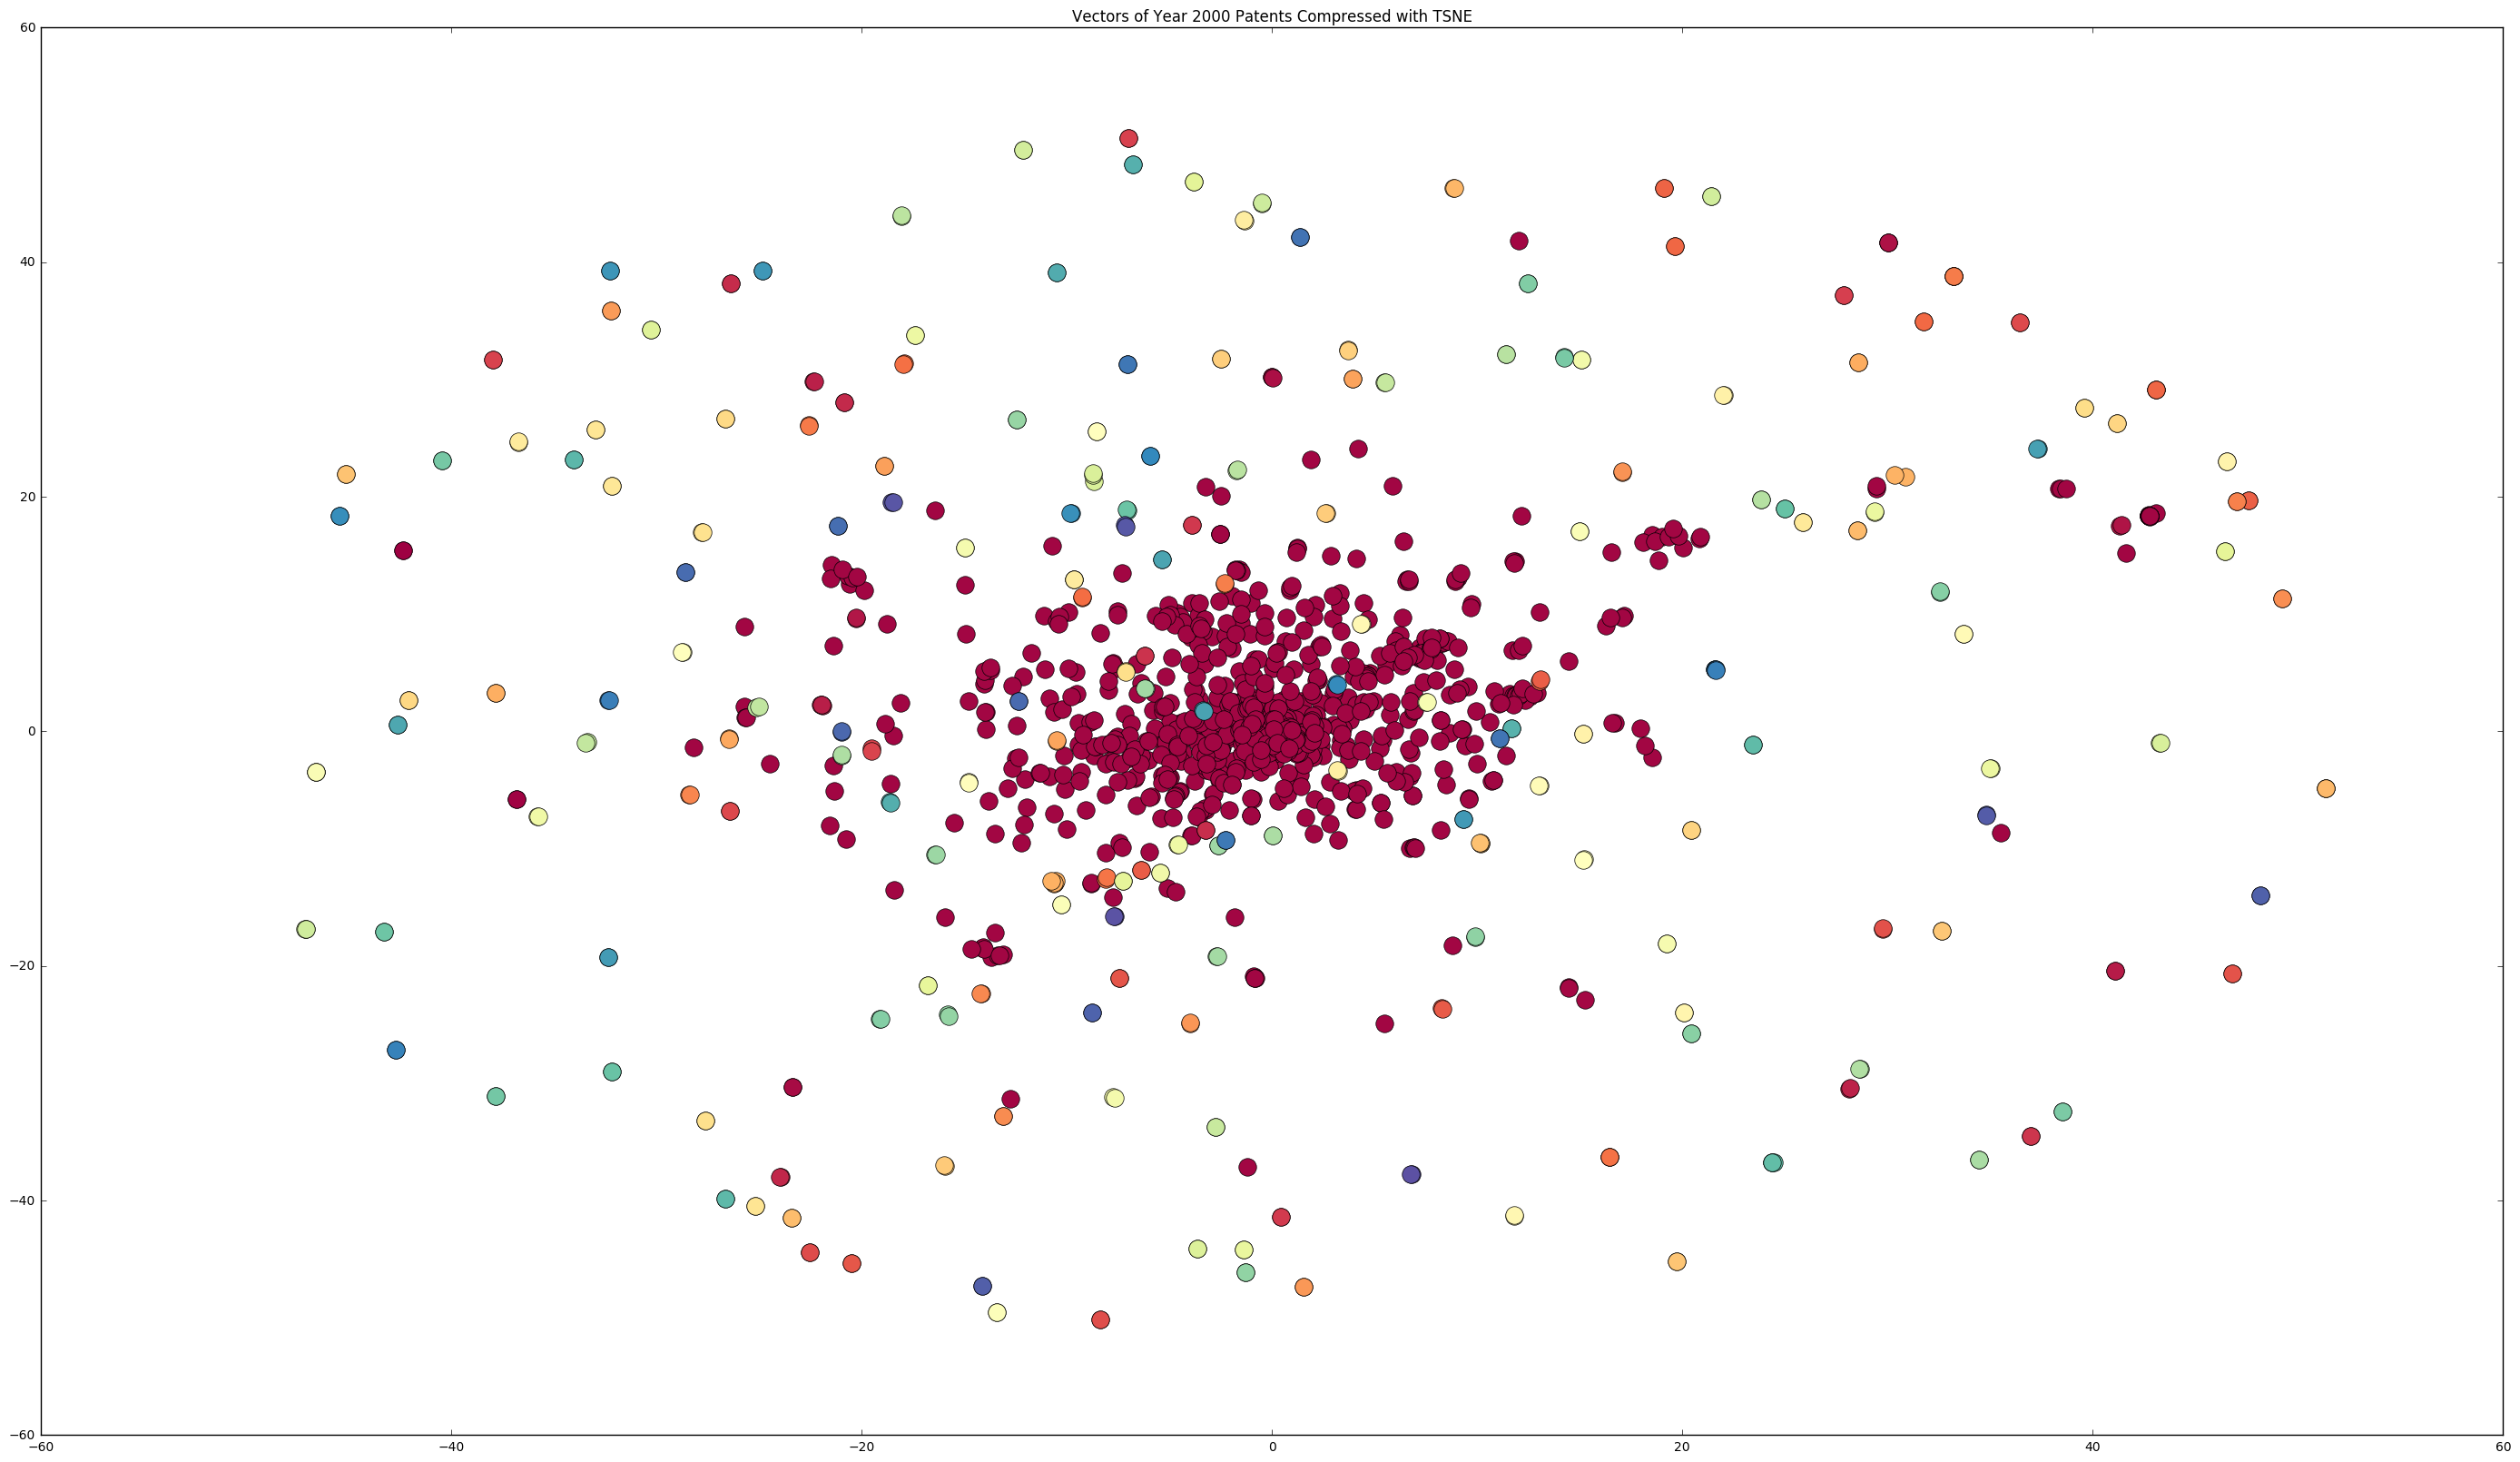

In [6]:
fig = plt.figure(figsize = (35,20))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k,col in zip(unique_labels, colors):
    if k==-1:
        continue
    class_member_mask = (labels == k)
    xy = pretty[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = pretty[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.title('Vectors of Year 2000 Patents Compressed with TSNE')
plt.savefig('2000patvecs.png');

In [7]:
vecs = workingd[labels==2]

In [25]:
pno2 = workpno[labels==2]

In [29]:
len(labels2)

892

In [27]:
with open('smallPno.pkl', 'wb') as picklefile:
    pickle.dump(pno2, picklefile)
with open('subLabs.pkl', 'wb') as picklefile:
    pickle.dump(labels2, picklefile)

In [3]:
with open('smallPno.pkl','rb') as pfile:
    pno2 = pickle.load(pfile)
with open('subLabs.pkl','rb') as pfile:
    labels2 = pickle.load(pfile)

In [17]:
dbs = DBSCAN(eps = .05, min_samples = 3, metric = 'cosine', n_jobs = -1).fit(vecs)
labels2 = np.asarray(dbs.labels_)
n_clusters_ = len(set(labels2)) - (1 if -1 in labels else 0)
print(n_clusters_)
for j in list(set(labels2)):
    print(j, end = ': ')
    print(sum([x == j for x in labels2]))

6
0: 202
1: 7
2: 12
3: 3
4: 4
5: 3
-1: 661


In [15]:
pno2[labels2==4]

array(['6100383', '6156773', '6169099', '6150383'], dtype='<U18')

In [18]:
prettys = TSNE(n_components = 2, metric = 'cosine', init = 'pca', random_state = 66, \
              angle = .7).fit_transform(vecs)

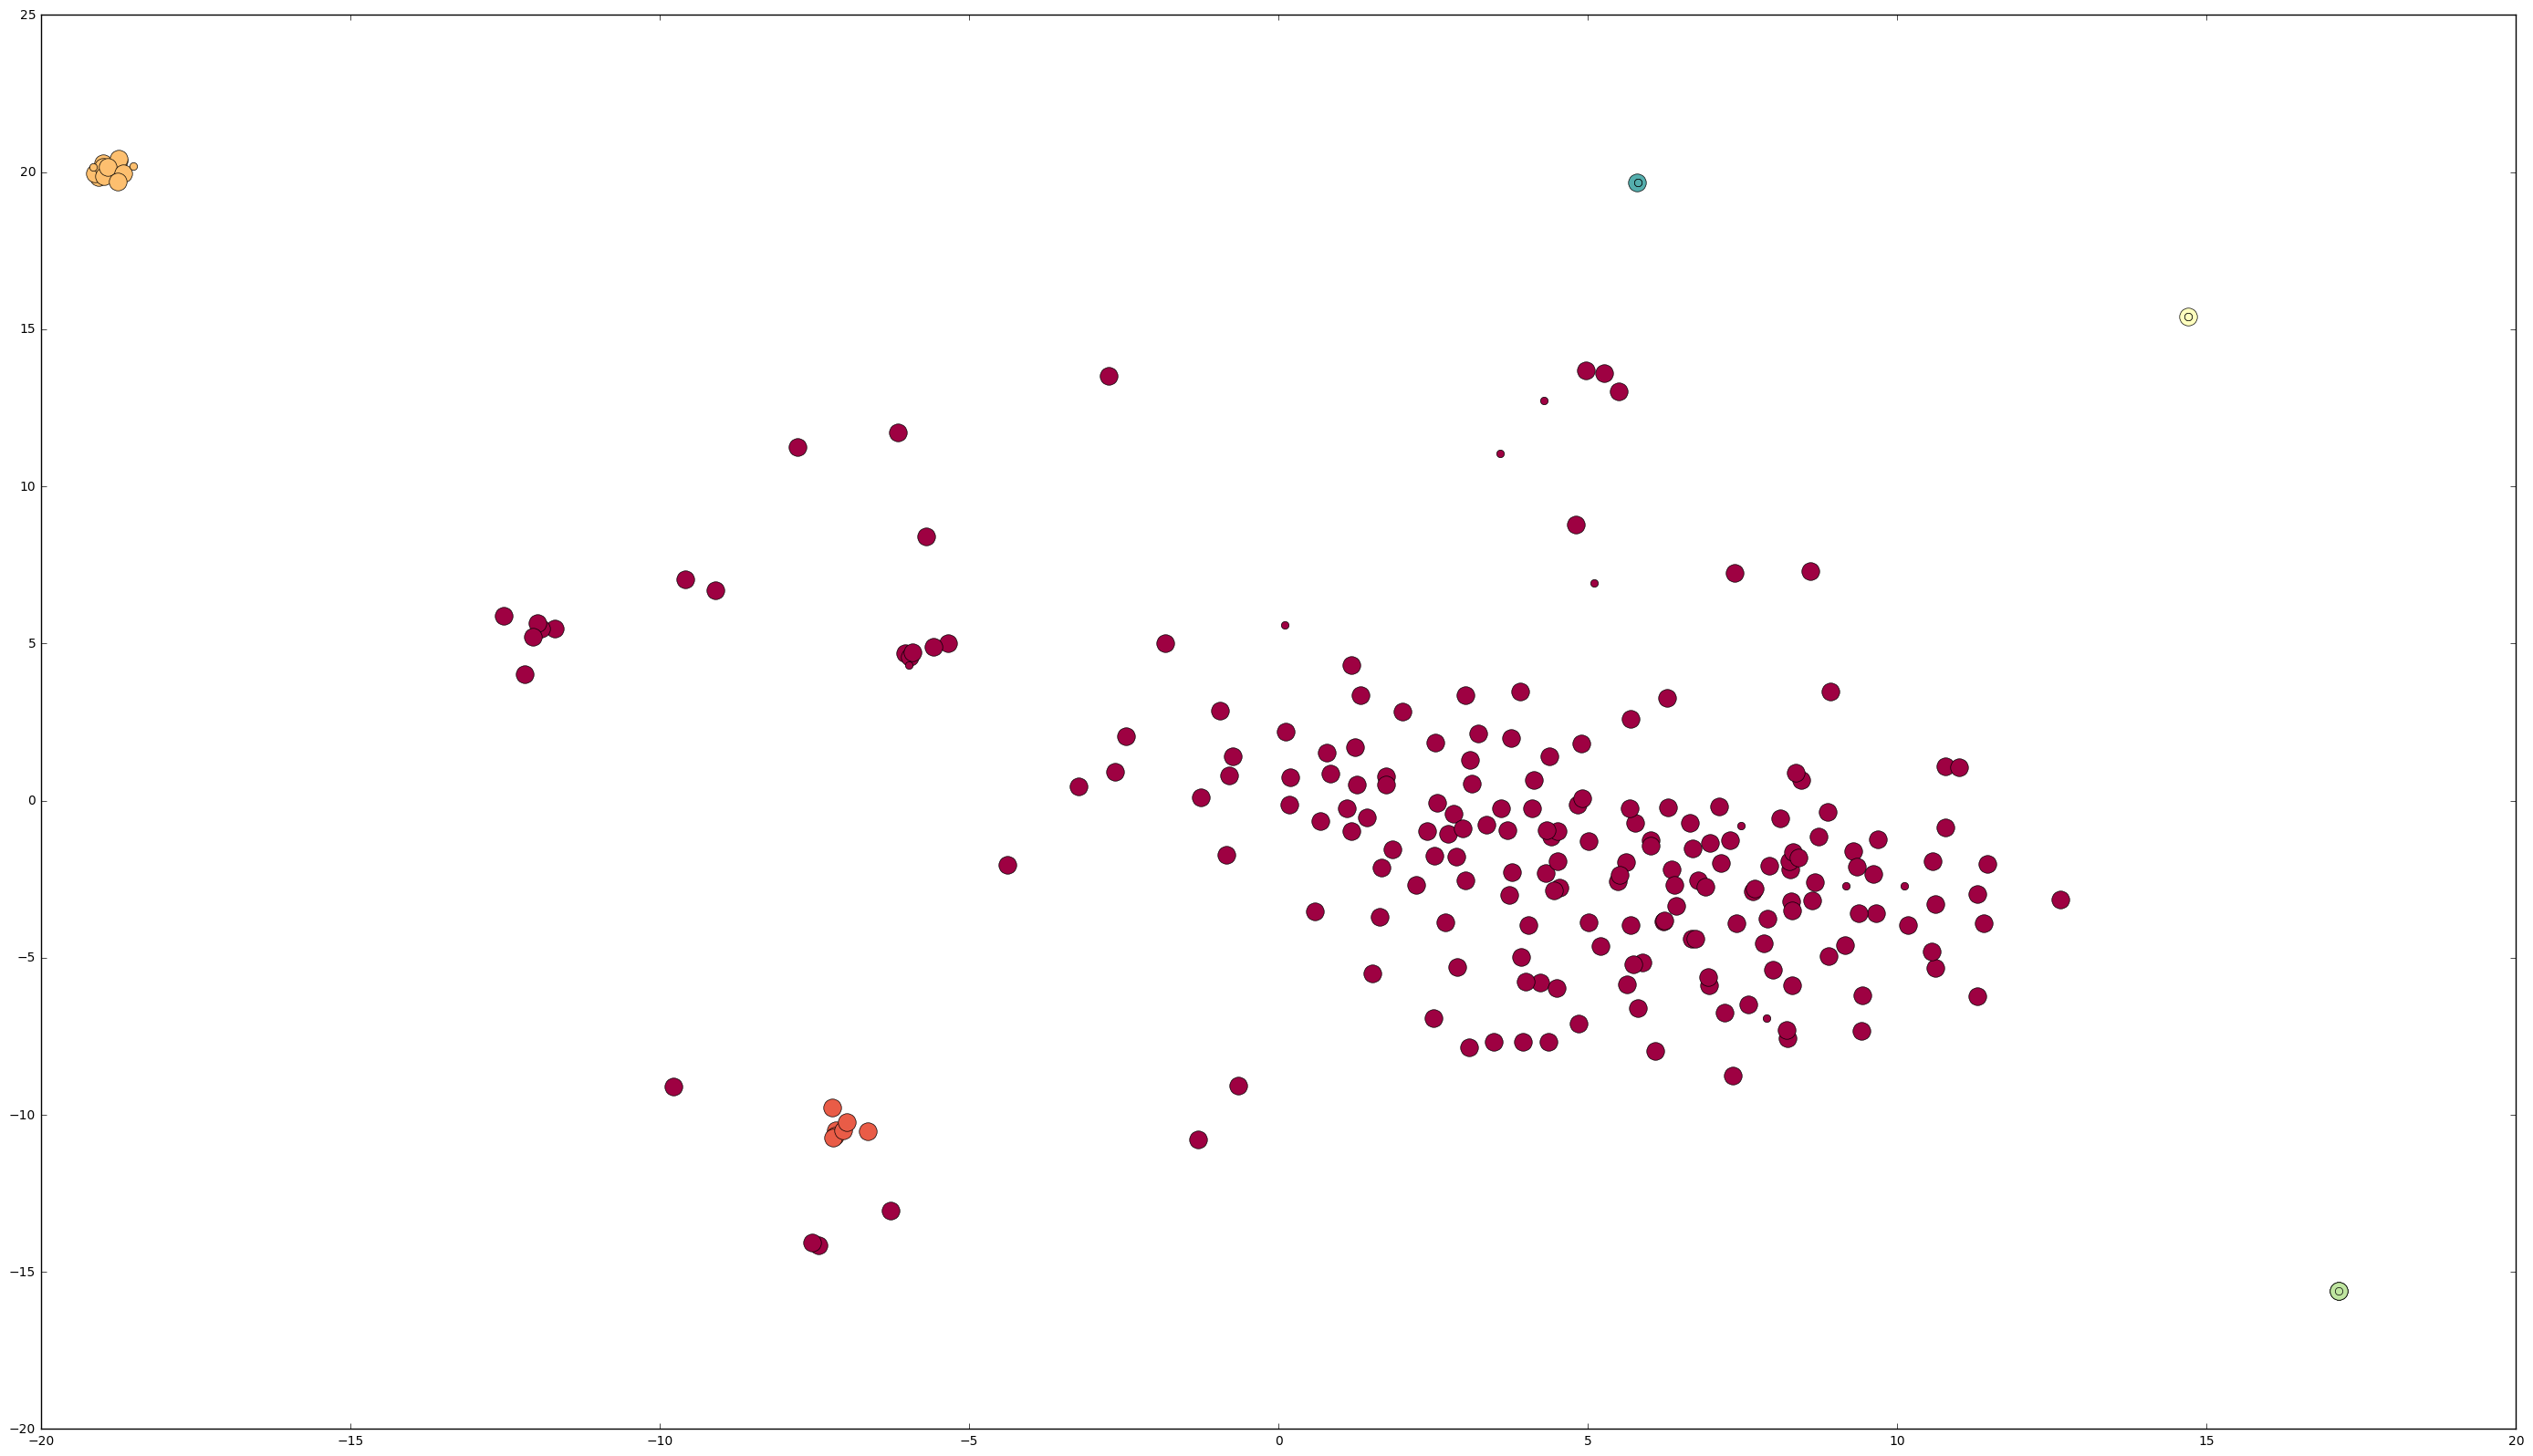

In [19]:
fig = plt.figure(figsize = (35,20))
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
unique_labels = set(np.asarray(dbs.labels_))
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k,col in zip(unique_labels, colors):
    if k==-1:
        continue
    class_member_mask = (labels2 == k)
    xy = prettys[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = prettys[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)